## Assignment 3a - Task 2: Collaborative Filtering

### Rizal Hamdan Arigusti, a1939989, Version 01
### Group 14

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load Dataset

In [11]:
train_set = pd.read_csv("../../data/Groceries data train.csv")
test_set = pd.read_csv("../../data/Groceries data test.csv")

train_set = train_set.rename(columns={"User_id": "user_id", "Date": "date","itemDescription": "item_description"})
test_set = test_set.rename(columns={"User_id": "user_id", "Date": "date","itemDescription": "item_description"})

In [12]:
train_set = train_set.dropna(how='all')

missing_per_column = train_set.isnull().sum()
print("Missing values per column:\n", missing_per_column)

Missing values per column:
 user_id             0
date                0
item_description    0
year                0
month               0
day                 0
day_of_week         0
dtype: int64


In [13]:
train_set.head()

,user_id,date,item_description,year,month,day,day_of_week
0,2351.0,1/01/2014,cleaner,2014.0,1.0,1.0,2.0
1,2226.0,1/01/2014,sausage,2014.0,1.0,1.0,2.0
2,1922.0,1/01/2014,tropical fruit,2014.0,1.0,1.0,2.0
3,2943.0,1/01/2014,whole milk,2014.0,1.0,1.0,2.0
4,1249.0,1/01/2014,citrus fruit,2014.0,1.0,1.0,2.0


In [14]:
grouped_transaction_train_set = train_set.groupby(['user_id', 'date', "year", "month", "day", "day_of_week"]).agg({
    'item_description': list
}).reset_index()

grouped_transaction_train_set = grouped_transaction_train_set.rename(columns={"item_description": "items"})
grouped_transaction_train_set


,user_id,date,year,month,day,day_of_week,items
0,1000.0,24/06/2014,2014.0,6.0,24.0,1.0,"[whole milk, pastry, salty snack]"
1,1001.0,12/12/2014,2014.0,12.0,12.0,4.0,"[whole milk, soda]"
2,1001.0,2/07/2014,2014.0,7.0,2.0,2.0,"[sausage, whole milk, rolls/buns]"
3,1001.0,20/01/2015,2015.0,1.0,20.0,1.0,"[frankfurter, soda]"
4,1002.0,2/09/2014,2014.0,9.0,2.0,1.0,"[frozen vegetables, other vegetables]"
...,...,...,...,...,...,...,...
8356,4997.0,1/05/2014,2014.0,5.0,1.0,3.0,"[whole milk, canned beer]"
8357,4999.0,19/05/2014,2014.0,5.0,19.0,0.0,"[other vegetables, detergent]"
8358,4999.0,4/09/2014,2014.0,9.0,4.0,3.0,"[semi-finished bread, newspapers]"
8359,5000.0,16/11/2014,2014.0,11.0,16.0,6.0,"[bottled beer, other vegetables]"


In [103]:
grouped_transaction_test_set = test_set.groupby(['user_id', 'date', "year", "month", "day", "day_of_week"]).agg({
    'item_description': list
}).reset_index()
grouped_transaction_test_set = grouped_transaction_test_set.rename(columns={"item_description": "items"})
grouped_transaction_test_set

,user_id,date,year,month,day,day_of_week,items
0,1000,15/03/2015,2015,3,15,6,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24/07/2015,2015,7,24,4,"[canned beer, misc. beverages]"
2,1000,25/11/2015,2015,11,25,2,"[sausage, hygiene articles]"
3,1000,27/05/2015,2015,5,27,2,"[soda, pickled vegetables]"
4,1001,14/04/2015,2015,4,14,1,"[beef, white bread]"
...,...,...,...,...,...,...,...
6607,4999,16/05/2015,2015,5,16,5,"[butter milk, whipped/sour cream]"
6608,4999,18/02/2015,2015,2,18,2,"[berries, onions]"
6609,4999,24/01/2015,2015,1,24,5,"[tropical fruit, berries, other vegetables, yo..."
6610,4999,26/12/2015,2015,12,26,5,"[bottled water, herbs]"


### 2. Exploratory Data Analyis

#### 2.1 User-Items Ratio and Sparsity Check

In [16]:
n_users = train_set["user_id"].nunique()
n_items = train_set["item_description"].nunique()

n_interactions = train_set.groupby(["user_id", "item_description"]).size().shape[0]
n_possible_interactions = n_users * n_items

density = n_interactions / n_possible_interactions
sparsity = 1 - density


print(f"Sparsity: {sparsity:.2f}")
print(f"Density: {density:.2f}")
print("=" * 25)
print(f"Number of Users: {n_users}")
print(f"Number of Items: {n_items}")
print(f"User-Item Ratio: {n_users/n_items:.2f}")

Sparsity: 0.97
Density: 0.03
Number of Users: 3493
Number of Items: 167
User-Item Ratio: 20.92


#### 2.2 Number of Transaction of Each User

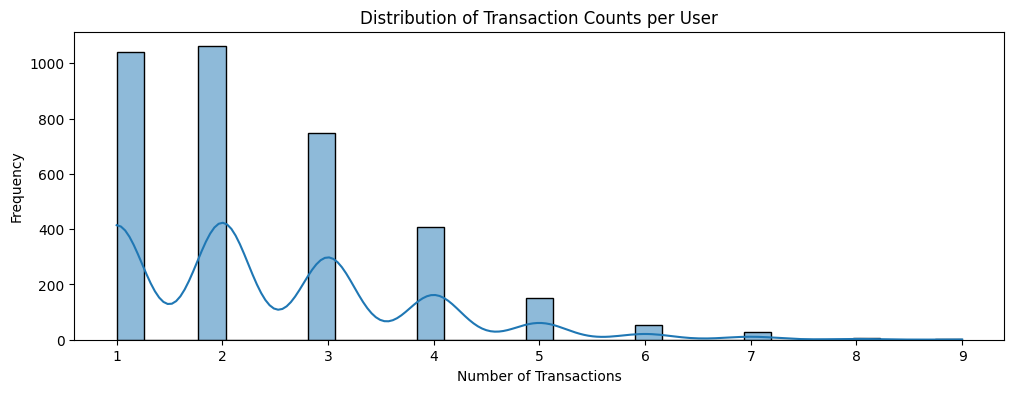

In [17]:
transaction_counts = grouped_transaction_train_set.groupby('user_id').size().reset_index(name='transaction_count')
plt.figure(figsize=(12, 4))
sns.histplot(transaction_counts['transaction_count'], kde=True)
plt.title('Distribution of Transaction Counts per User')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

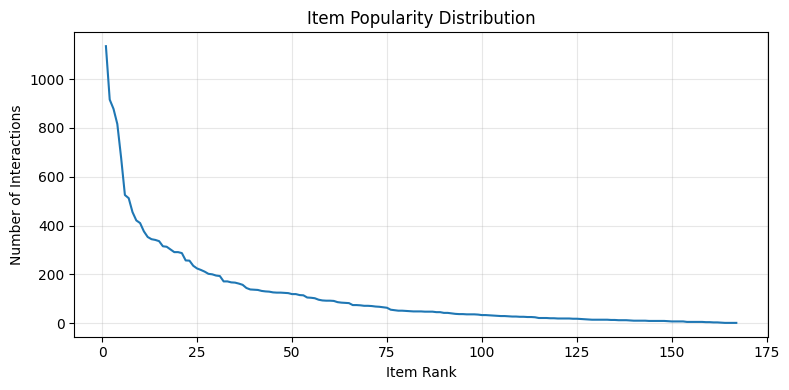

In [18]:
item_counts = train_set['item_description'].value_counts().reset_index()
item_counts.columns = ['item_description', 'transaction_count']

# Sort by interaction count (descending)
item_counts = item_counts.sort_values('transaction_count', ascending=False)

# Add rank column
item_counts['rank'] = range(1, len(item_counts) + 1)

# Basic plot of interactions by item (ordered by popularity)
plt.figure(figsize=(8, 4))
plt.plot(item_counts['rank'], item_counts['transaction_count'])
plt.title('Item Popularity Distribution')
plt.xlabel('Item Rank')
plt.ylabel('Number of Interactions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

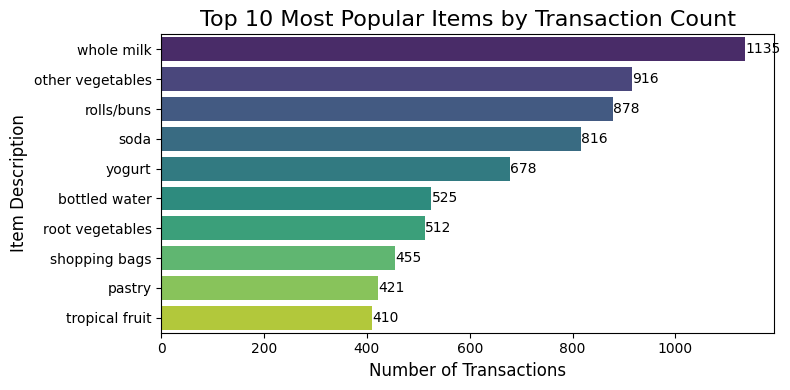

In [19]:
top_10_items = item_counts.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='transaction_count', y='item_description', data=top_10_items, palette='viridis', hue='item_description')

# Add labels and title
plt.title('Top 10 Most Popular Items by Transaction Count', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Item Description', fontsize=12)

# Add the transaction count at the end of each bar
for i, v in enumerate(top_10_items['transaction_count']):
    plt.text(v + 0.5, i, str(v), va='center')

# Adjust layout
plt.tight_layout()
plt.show()

### 3. Preprocessing

#### 3.1 Generate Utility Matrix

In [20]:
def generate_utility_matrix(dataset):

    utility_matrix = pd.crosstab(dataset['user_id'].astype(int), dataset['item_description'])
    utility_matrix.replace(0, np.nan, inplace=True)
    return utility_matrix

train_utility_matrix = generate_utility_matrix(train_set)
train_utility_matrix

# train_utility_matrix.isna().sum()

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
user_id,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [21]:
def mean_norm(array):
    # print(type(array))
    mean = np.mean(array)
    norm_array = [freq - mean for freq in array]
    return pd.Series(norm_array, index=array.index), mean


def normalize_utility_matrix(utility_matrix, type="item"):
    axis = 0 if type == "item" else 1
    mean_dict = {}
    
    def apply_mean_norm(x):
        norm_x, mean = mean_norm(x)
        mean_dict[x.name] = mean  # Store the mean for this item/user
        return norm_x
        
    utility_matrix_normalized = utility_matrix.apply(apply_mean_norm, axis=axis)
    return utility_matrix_normalized, pd.Series(mean_dict)
    

In [22]:
train_norm_utility_matrix_item_based, train_set_means_item_based = normalize_utility_matrix(train_utility_matrix.copy()) 
train_norm_utility_matrix_user_based, train_set_means_user_based = normalize_utility_matrix(train_utility_matrix.copy(), type="user") 

In [23]:
train_norm_utility_matrix_item_based

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
user_id,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.202331,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.797669,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.202331,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.797669,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.202331,NaN,NaN


In [24]:
train_norm_utility_matrix_user_based

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
user_id,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.733333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [25]:
# test_normalized_utility_matrix_item_based, _ = normalize_utility_matrix(test_set.copy(), means=train_set_means_item_based)
# test_normalized_utility_matrix_user_based = normalize_utility_matrix(test_set.copy(), type="user", means=train_set_means_user_based)

In [109]:
def calculate_similarity(vector_1, vector_2):
    vector_1 = np.nan_to_num(vector_1, nan=0.0)
    vector_2 = np.nan_to_num(vector_2, nan=0.0)
    
    dot_product = np.dot(vector_1, vector_2)
    
    magnitude = np.sqrt(np.sum(vector_1 ** 2) * np.sum(vector_2 ** 2))
    if magnitude == 0:
        return 0.0
    return dot_product / magnitude

def predict_rating(similarity_table, utility_matrix, user_purchased_items, target_user, k=3):
    most_similar_items = similarity_table[:k]
    
    weighted_sum = 0
    similarity_sum = 0
        
    for similar_item_name, similarity_value in most_similar_items:
        if similar_item_name in user_purchased_items:
                
            rating = utility_matrix.loc[target_user, similar_item_name]
            weighted_sum += similarity_value * rating
            similarity_sum += abs(similarity_value)
            
    if similarity_sum == 0:
        return 0.0
   
    return weighted_sum / similarity_sum

def generate_similarity_table(target_item_name, utility_matrix):
    similarity_dict = {}
    target_item = utility_matrix[target_item_name]
    for compared_item_name in utility_matrix.columns:
        if compared_item_name == target_item_name:
            continue
        compared_item = utility_matrix[compared_item_name]
        similarity = calculate_similarity(target_item.fillna(0), compared_item.fillna(0))
        similarity_dict[compared_item_name] = similarity
    
    similarity_dict = sorted(similarity_dict.items(), key=lambda item: item[1], reverse=True)
    return similarity_dict
    
def recommend_items(utility_matrix, norm_utility_matrix, target_user, n_recommend_items=10):
    user_ratings_row = utility_matrix.loc[target_user]

    user_unpurchased_items = user_ratings_row[user_ratings_row.isna()].index.tolist()
    user_purchased_items = user_ratings_row[~user_ratings_row.isna()].index.tolist()
    rating_predictions = {}
    for item in user_unpurchased_items:
        similarity_table = generate_similarity_table(item, norm_utility_matrix)
        predicted_rating = predict_rating(similarity_table, utility_matrix, user_purchased_items, target_user, 10)
        rating_predictions[item] = predicted_rating
    
    
    
    recommended_items = sorted(rating_predictions.items(), key=lambda x: x[1], reverse=True)
    return recommended_items[:n_recommend_items]

recommend_items(train_utility_matrix, train_norm_utility_matrix_item_based, 1050)

[('bottled beer', 2.0),
 ('canned vegetables', 2.0),
 ('dessert', 2.0),
 ('frozen fish', 2.0),
 ('ham', 2.0),
 ('mustard', 2.0),
 ('newspapers', 2.0),
 ('packaged fruit/vegetables', 2.0),
 ('pip fruit', 2.0),
 ('root vegetables', 2.0)]